In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pyfolio as pf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
start = datetime(2020,3,11)
end = datetime(2020,4,11)

data = web.DataReader('MSFT','yahoo',start,end)
data['Day'] = data.index.date
data['returns'] = data['Adj Close'].pct_change()
data.head()

,High,Low,Open,Close,Volume,Adj Close,Day,returns
Date,,,,,,,,
2020-03-10,161.029999,152.580002,158.160004,160.919998,65354400,160.919998,2020-03-10,NaN
2020-03-11,157.699997,151.149994,157.130005,153.630005,56371600,153.630005,2020-03-11,-0.045302
2020-03-12,153.470001,138.580002,145.300003,139.059998,93226400,139.059998,2020-03-12,-0.094838
2020-03-13,161.910004,140.729996,147.500000,158.830002,92727400,158.830002,2020-03-13,0.142169
2020-03-16,149.350006,135.000000,140.000000,135.419998,87905900,135.419998,2020-03-16,-0.147390


In [4]:
df = pd.read_excel('SentimentData.xlsx')

In [5]:
df['datetime']  = pd.to_datetime(df['publishedAt'])
df['Day'] = df['datetime'].apply(lambda x:x.date())
df.head()

,Unnamed: 0,publishedAt,author,content,description,source,title,url,urlToImage,polarity,subjectivity,vader sentiment,datetime,Day
0,0,2020-03-11T16:54:24Z,Reuters Editorial,WASHINGTON (Reuters) - White House officials m...,White House officials met Wednesday with U.S. ...,"{'id': 'reuters', 'name': 'Reuters'}","White House, tech industry meet to discuss cor...",https://www.reuters.com/article/us-health-coro...,https://s4.reutersmedia.net/resources_v2/image...,0.006203,0.303314,0.7845,2020-03-11 16:54:24+00:00,2020-03-11
1,1,2020-03-11T21:57:14Z,NaN,NaN,NaN,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Volatilty Presents Buying Opportunities in App...,https://www.bloomberg.com/news/videos/2020-03-...,NaN,0.500000,0.694444,0.8065,2020-03-11 21:57:14+00:00,2020-03-11
2,2,2020-03-11T10:28:53Z,David Randall,NEW YORK (Reuters) - The deep declines in the ...,The deep declines in the U.S. stock market ove...,"{'id': 'reuters', 'name': 'Reuters'}",Explainer: Coronavirus fears hit the market ha...,https://www.reuters.com/article/us-health-coro...,https://s3.reutersmedia.net/resources/r/?m=02&...,0.087103,0.407712,0.5967,2020-03-11 10:28:53+00:00,2020-03-11
3,3,2020-03-11T04:13:26Z,https://www.facebook.com/bbcnews,Image copyrightGetty Images\r\nGoogle's parent...,Parent company Alphabet is the latest tech fir...,"{'id': 'bbc-news', 'name': 'BBC News'}",Google tells staff to work home due to coronav...,https://www.bbc.co.uk/news/technology-51828782,https://ichef.bbci.co.uk/news/1024/branded_new...,0.046751,0.395779,0.6124,2020-03-11 04:13:26+00:00,2020-03-11
4,4,2020-03-11T18:15:00Z,Valentina Pop,BRUSSELSThe European Union is reviving an alli...,Pact formed last year to target false content ...,"{'id': 'the-wall-street-journal', 'name': 'The...","EU, Tech Firms Renew Alert System to Fight Cor...",https://www.wsj.com/articles/eu-tech-firms-ren...,https://images.wsj.net/im-163181/social,-0.011111,0.211111,0.8176,2020-03-11 18:15:00+00:00,2020-03-11


In [6]:
sentiment_scores = df[['Day','polarity','subjectivity','vader sentiment']]

In [7]:
sentiment_scores.head()

,Day,polarity,subjectivity,vader sentiment
0,2020-03-11,0.006203,0.303314,0.7845
1,2020-03-11,0.500000,0.694444,0.8065
2,2020-03-11,0.087103,0.407712,0.5967
3,2020-03-11,0.046751,0.395779,0.6124
4,2020-03-11,-0.011111,0.211111,0.8176


In [8]:
score_min = sentiment_scores.groupby('Day',as_index=False).min()
score_min.columns = ['Day','polarity_min','subjectivity_min','vader_min']
score_min.head()

,Day,polarity_min,subjectivity_min,vader_min
0,2020-03-11,-0.065404,0.211111,-0.9509
1,2020-03-12,0.006203,0.303314,-0.9677
2,2020-03-13,0.040600,0.334722,-0.9855
3,2020-03-14,0.073176,0.276755,0.0000
4,2020-03-15,-0.022727,0.340593,0.7003


In [9]:
score_max = sentiment_scores.groupby('Day',as_index=False).max()
score_max.columns = ['Day','polarity_max','subjectivity_max','vader_max']
score_max.head()

,Day,polarity_max,subjectivity_max,vader_max
0,2020-03-11,0.500000,0.694444,0.9744
1,2020-03-12,0.204632,0.543664,0.9913
2,2020-03-13,0.500000,0.694444,0.9898
3,2020-03-14,0.147574,0.518797,0.9968
4,2020-03-15,0.109267,0.470909,0.9903


In [10]:
score_combine = pd.merge(score_max,score_min, on='Day')
score_combine['extreme_score'] = score_combine['vader_max']+score_combine['vader_min']
score_combine.head()

,Day,polarity_max,subjectivity_max,vader_max,polarity_min,subjectivity_min,vader_min,extreme_score
0,2020-03-11,0.500000,0.694444,0.9744,-0.065404,0.211111,-0.9509,0.0235
1,2020-03-12,0.204632,0.543664,0.9913,0.006203,0.303314,-0.9677,0.0236
2,2020-03-13,0.500000,0.694444,0.9898,0.040600,0.334722,-0.9855,0.0043
3,2020-03-14,0.147574,0.518797,0.9968,0.073176,0.276755,0.0000,0.9968
4,2020-03-15,0.109267,0.470909,0.9903,-0.022727,0.340593,0.7003,1.6906


In [11]:
score = score_combine[['Day','extreme_score']].copy()
score.head()

,Day,extreme_score
0,2020-03-11,0.0235
1,2020-03-12,0.0236
2,2020-03-13,0.0043
3,2020-03-14,0.9968
4,2020-03-15,1.6906


In [14]:
pricedata = pd.merge(data,score,on='Day',how='left')
pricedata = pricedata.fillna(method='ffill')
pricedata.head()

,High,Low,Open,Close,Volume,Adj Close,Day,returns,extreme_score
0,161.029999,152.580002,158.160004,160.919998,65354400,160.919998,2020-03-10,NaN,NaN
1,157.699997,151.149994,157.130005,153.630005,56371600,153.630005,2020-03-11,-0.045302,0.0235
2,153.470001,138.580002,145.300003,139.059998,93226400,139.059998,2020-03-12,-0.094838,0.0236
3,161.910004,140.729996,147.500000,158.830002,92727400,158.830002,2020-03-13,0.142169,0.0043
4,149.350006,135.000000,140.000000,135.419998,87905900,135.419998,2020-03-16,-0.147390,0.0042


In [19]:
threshold = pricedata.extreme_score.expanding().mean()

In [21]:
pricedata['signal']=np.where(pricedata['extreme_score']>threshold,1,np.where(pricedata['extreme_score']<threshold,-1,0))

In [22]:
pricedata['position']=pricedata['signal'].shift(1)
pricedata['strategy_returns']=pricedata.returns*pricedata.position

Text(0, 0.5, 'Returns')

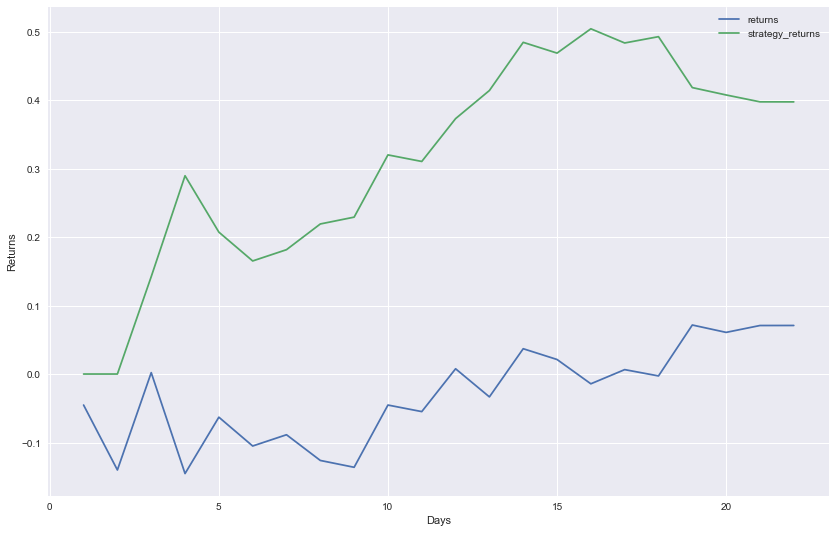

In [24]:
pricedata[['returns','strategy_returns']].cumsum().plot(grid=True,figsize=(14,9))
plt.xlabel('Days')
plt.ylabel('Returns')

In [28]:
pricedata.set_index('Day',inplace=True)

Start date,2020-03-10
End date,2020-04-09
Total months,1
,Backtest
Annual return,32.8%
Cumulative returns,2.6%
Annual volatility,103.8%
Sharpe ratio,0.78
Calmar ratio,2.07
Stability,0.49
Max drawdown,-15.8%


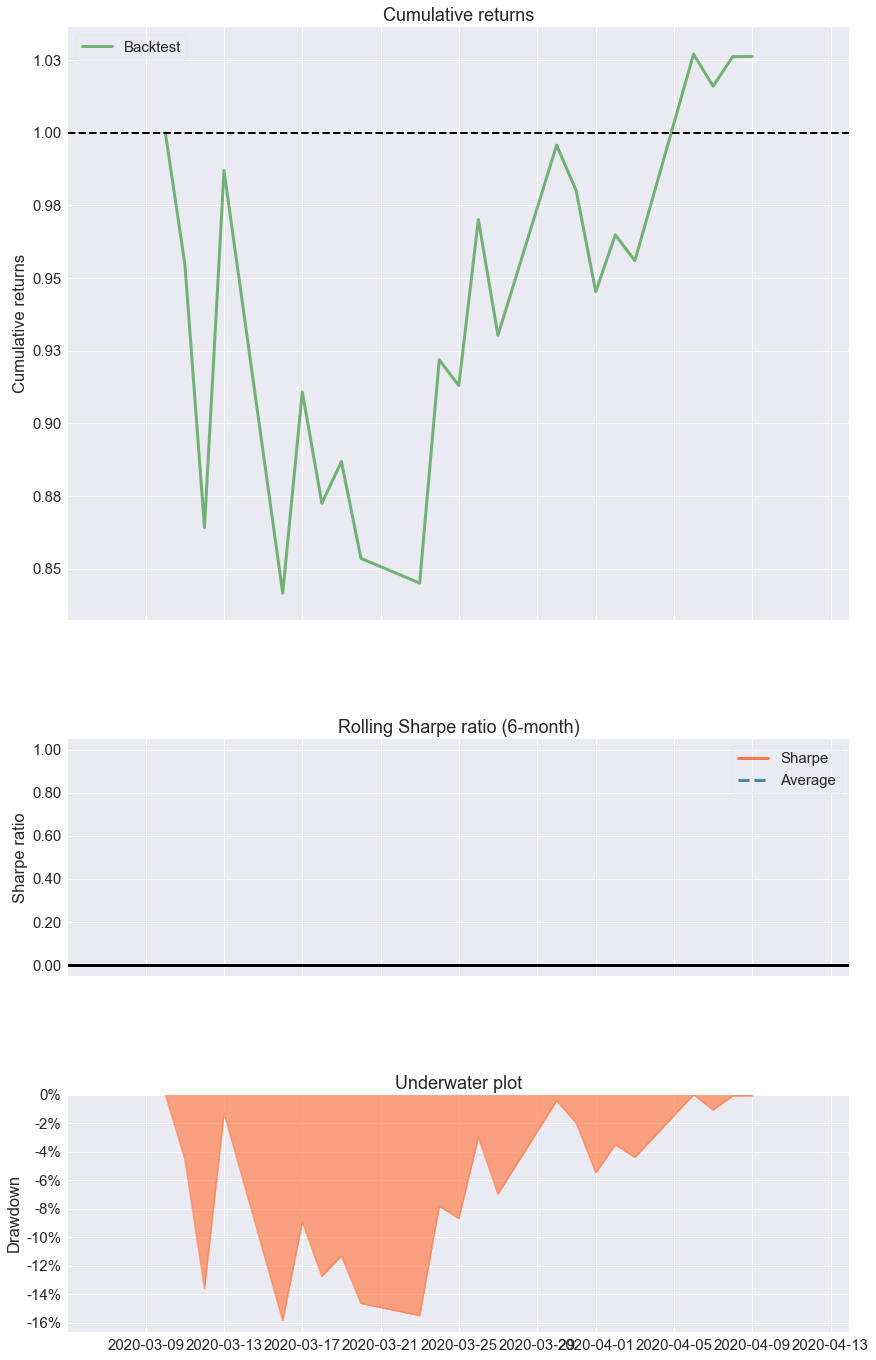

In [32]:
pf.create_simple_tear_sheet(pricedata['returns'])

Start date,2020-03-10
End date,2020-04-09
Total months,1
,Backtest
Annual return,5058.9%
Cumulative returns,43.3%
Annual volatility,92.8%
Sharpe ratio,4.91
Calmar ratio,418.20
Stability,0.72
Max drawdown,-12.1%


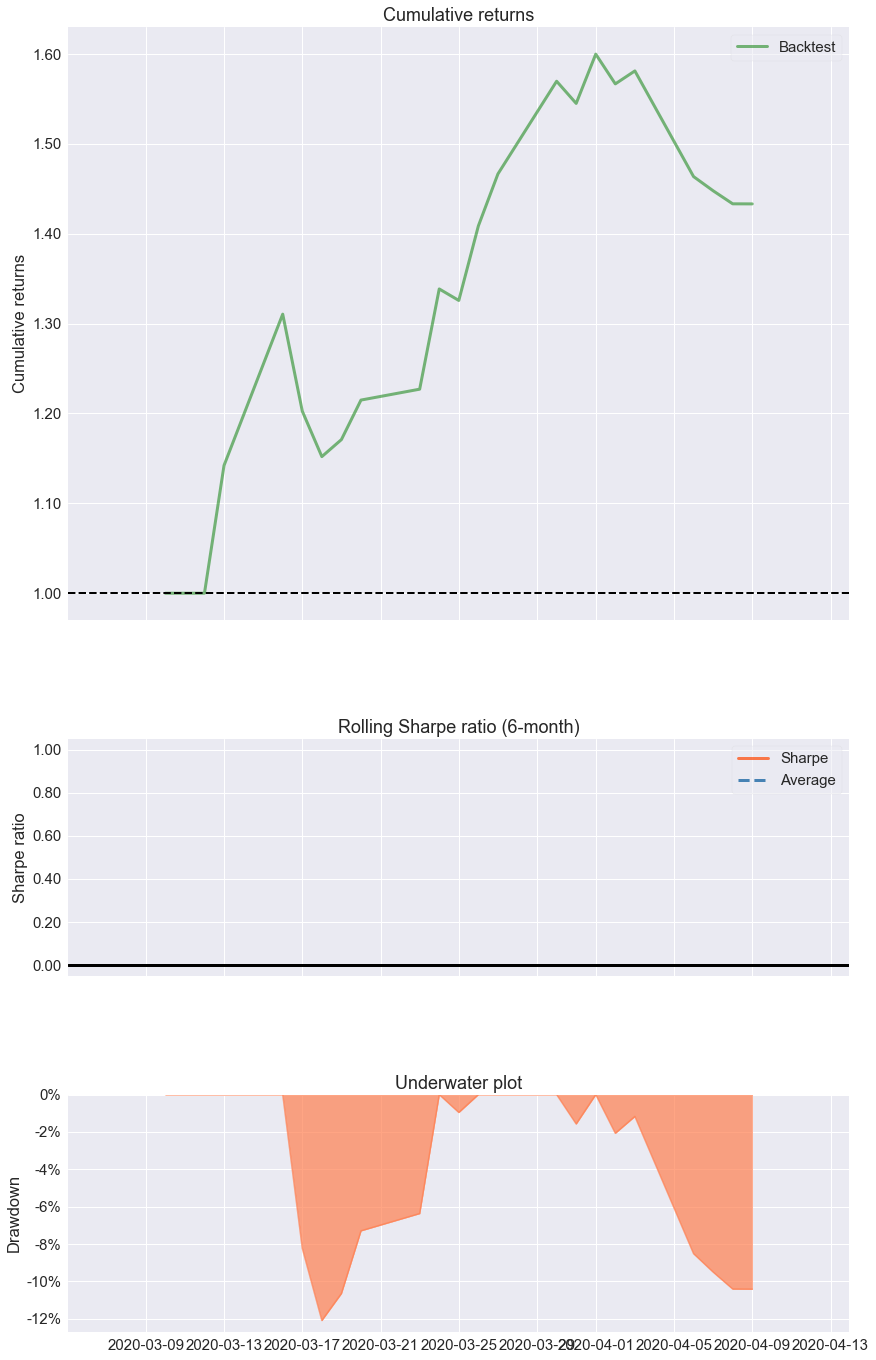

In [35]:
pf.create_simple_tear_sheet(pricedata['strategy_returns'])